In [1]:
# Install necessary libraries if not already installed
!pip install torch torchvision

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import os

# Specify the path to your new directory
directory_path = '/content/drive/My Drive/project'

# Check if the directory exists
if not os.path.exists(directory_path):
    os.makedirs(directory_path)
    print(f'Directory created at: {directory_path}')
else:
    print(f'Directory already exists at: {directory_path}')


Directory already exists at: /content/drive/My Drive/project


In [5]:
import os

# Set to a known directory that definitely exists
os.chdir('/content/drive/My Drive/')

# Verify the current working directory
print("Current working directory:", os.getcwd())


Current working directory: /content/drive/My Drive


In [6]:
# List the contents of the current directory to confirm its existence and accessibility
!ls


'Colab Notebooks'	     'Nonstop - Drake'
 major_project-train	      project
 major-project-videos-train  'SRM - 21st April Final.xlsx'


In [7]:
# List the contents of the 'project' directory
!ls "/content/drive/My Drive/project"


data.csv


In [8]:
import pandas as pd

# Adjust the path based on where your file is located in Google Drive
df = pd.read_csv('/content/drive/My Drive/project/data.csv')  # Replace with your actual path

# Display the first few rows of the dataset
print(df.head())


   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           13.297218          6.327112     1.347214  ...                 0   
1            4.542524          7.619885     0.518767  ...                 0   
2           19.555085          7.844988     1.826335  ...                 0   
3           12.209266          8.428001     7.435604  ...                 0   
4           18.454356          6.310461     0.795498  ...                 0   

   BehavioralProblems       ADL  Confusion  Disorientation  \
0     

In [9]:
# Check the column names in your DataFrame
print(df.columns)


Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')


In [10]:
# Separate features and labels
X = df.drop('Confusion', axis=1).select_dtypes(include=[np.number]).values  # Use only numeric columns as features
y = df['Confusion'].values  # Set BMI as the target


In [11]:
# One-hot encode categorical columns
X = pd.get_dummies(df.drop('Confusion', axis=1), drop_first=True).values  # Drop BMI for features


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [13]:
import torch
from torch.utils.data import Dataset, DataLoader

class AlzheimerDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.float32)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# Create Dataset instances
train_dataset = AlzheimerDataset(X_train, y_train)
test_dataset = AlzheimerDataset(X_test, y_test)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [14]:
import torch.nn as nn
import torch.optim as optim

class AlzheimerModel(nn.Module):
    def __init__(self):
        super(AlzheimerModel, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)  # Output layer for regression

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)  # No activation for regression
        return x

# Initialize the model, loss function, and optimizer
model = AlzheimerModel()
criterion = nn.MSELoss()  # Mean Squared Error for regression
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [15]:
num_epochs = 20  # You can adjust this based on your needs

for epoch in range(num_epochs):
    model.train()
    for features, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(features).squeeze()  # Remove unnecessary dimensions
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1/20], Loss: 0.1723
Epoch [2/20], Loss: 0.1240
Epoch [3/20], Loss: 0.1255
Epoch [4/20], Loss: 0.2498
Epoch [5/20], Loss: 0.1948
Epoch [6/20], Loss: 0.1632
Epoch [7/20], Loss: 0.1318
Epoch [8/20], Loss: 0.1404
Epoch [9/20], Loss: 0.0864
Epoch [10/20], Loss: 0.1313
Epoch [11/20], Loss: 0.1410
Epoch [12/20], Loss: 0.1143
Epoch [13/20], Loss: 0.1261
Epoch [14/20], Loss: 0.1060
Epoch [15/20], Loss: 0.0930
Epoch [16/20], Loss: 0.1115
Epoch [17/20], Loss: 0.0964
Epoch [18/20], Loss: 0.0755
Epoch [19/20], Loss: 0.0634
Epoch [20/20], Loss: 0.0557


In [16]:
def evaluate_model(model, data_loader):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for features, labels in data_loader:
            outputs = model(features).squeeze()
            loss = criterion(outputs, labels)
            total_loss += loss.item()
    return total_loss / len(data_loader)

# Calculate MSE on the test set
test_loss = evaluate_model(model, test_loader)
print(f'Test Loss (MSE): {test_loss:.4f}')


Test Loss (MSE): 0.2331


In [17]:
# Assuming you're using 'Forgetfulness' or another column as your target
# Let's create a binary target variable based on a threshold
threshold = 20  # Define your threshold based on domain knowledge or data analysis
y_binary = (df['Confusion'] > threshold).astype(int).values  # 1 if above threshold, else 0


In [18]:
# Separate features and binary labels
X = df.drop('Confusion', axis=1).select_dtypes(include=[np.number]).values  # Use only numeric columns
y = y_binary  # Use the binary target variable


In [19]:
class AlzheimerModel(nn.Module):
    def __init__(self):
        super(AlzheimerModel, self).__init__()
        self.fc1 = nn.Linear(X.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)  # Output layer for binary classification

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))  # Sigmoid for binary classification
        return x


In [20]:
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss



In [21]:
import torch.nn as nn

class AlzheimerModel(nn.Module):
    def __init__(self):
        super(AlzheimerModel, self).__init__()
        self.fc1 = nn.Linear(X.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)  # Output layer for binary classification

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))  # Sigmoid to constrain output between 0 and 1
        return x


In [22]:
model = AlzheimerModel()  # Reinitialize the model

In [23]:
for epoch in range(num_epochs):
    model.train()
    for features, labels in train_loader:
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(features).squeeze()  # Forward pass

        # Print outputs to check their range
        print("Outputs:", outputs.detach().numpy())
        print("Min output:", outputs.min().item(), "Max output:", outputs.max().item())

        # Check if outputs are valid
        if (outputs < 0).any() or (outputs > 1).any():
            print("Outputs are out of range!")

        # Calculate loss
        loss = criterion(outputs, labels.float())  # Ensure labels are float for BCELoss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Streaming output truncated to the last 5000 lines.
 0.51104367 0.51406133]
Min output: 0.49279507994651794 Max output: 0.5510608553886414
Outputs: [0.49897143 0.5117346  0.509338   0.5074873  0.5074242  0.5281789
 0.5142269  0.50628555 0.5195335  0.5212817  0.51429313 0.52291006
 0.5101341  0.5032751  0.51038027 0.47940153 0.5252721  0.505767
 0.5131366  0.5192264  0.5179473  0.5071076  0.50155836 0.512703
 0.49587125 0.51549333 0.5205459  0.502394   0.5211284  0.50909543
 0.50058836 0.5196721 ]
Min output: 0.47940152883529663 Max output: 0.528178870677948
Outputs: [0.51555735 0.50894856 0.5013065  0.5019854  0.4987748  0.50814474
 0.50160956 0.5120562  0.49428257 0.51931995 0.5251873  0.5038435
 0.5120062  0.5125527  0.5109144  0.5116851  0.491715   0.51635337
 0.51767915 0.51269877 0.49751562 0.5178417  0.5205216  0.53402436
 0.50905865 0.5130912  0.518567   0.5125903  0.51468307 0.52483016
 0.5194224  0.5152286 ]
Min output: 0.4917150139808655 Max output: 0.5340243577957153
Outputs:

In [24]:
def __init__(self):
    super(AlzheimerModel, self).__init__()
    self.fc1 = nn.Linear(X.shape[1], 64)
    self.fc2 = nn.Linear(64, 32)
    self.fc3 = nn.Linear(32, 1)

    # Weight initialization
    nn.init.xavier_uniform_(self.fc1.weight)
    nn.init.xavier_uniform_(self.fc2.weight)
    nn.init.xavier_uniform_(self.fc3.weight)


In [25]:
# Evaluate on the test set
accuracy = evaluate_model(model, test_loader)
print(f'Test Accuracy: {accuracy:.4f}')


Test Accuracy: 0.7071


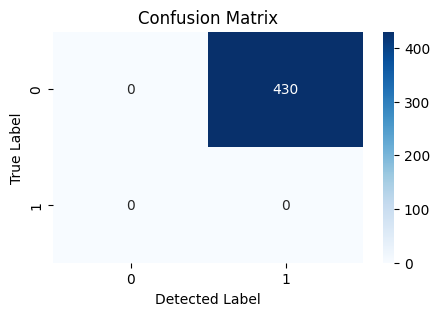

In [26]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Ensure that X_test and y_test are available
# Split the dataset into training and testing sets if not already done
from sklearn.model_selection import train_test_split

# Assuming `X` and `y` are your features and labels from the dataset
# Ensure you've already done this step earlier in your code:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Predicting labels using the trained model
y_pred = (model(torch.tensor(X_test, dtype=torch.float32)).detach().numpy() > 0.5).astype(int).flatten()  # Predicted labels

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Detected Label')
plt.ylabel('True Label')
plt.show()


Epoch [1/20], Loss: 0.7103
Epoch [2/20], Loss: 0.7103
Epoch [3/20], Loss: 0.7102
Epoch [4/20], Loss: 0.7102
Epoch [5/20], Loss: 0.7103
Epoch [6/20], Loss: 0.7103
Epoch [7/20], Loss: 0.7102
Epoch [8/20], Loss: 0.7102
Epoch [9/20], Loss: 0.7102
Epoch [10/20], Loss: 0.7103
Epoch [11/20], Loss: 0.7102
Epoch [12/20], Loss: 0.7102
Epoch [13/20], Loss: 0.7101
Epoch [14/20], Loss: 0.7103
Epoch [15/20], Loss: 0.7102
Epoch [16/20], Loss: 0.7102
Epoch [17/20], Loss: 0.7102
Epoch [18/20], Loss: 0.7102
Epoch [19/20], Loss: 0.7103
Epoch [20/20], Loss: 0.7102


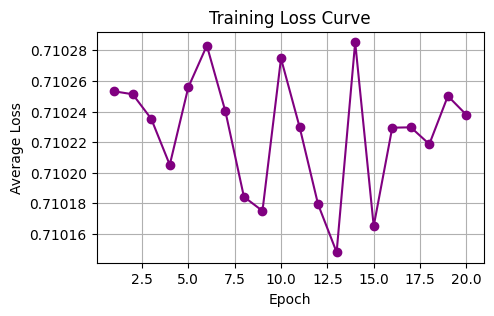

In [28]:
import matplotlib.pyplot as plt

# Initialize a list to store the loss values for each epoch
loss_values = []

# Training loop with tracking of loss values
num_epochs = 20  # Adjust this based on your needs

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    epoch_loss = 0  # To accumulate the loss per epoch

    for features, labels in train_loader:
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(features).squeeze()  # Forward pass

        # Calculate loss
        loss = criterion(outputs, labels.float())  # Ensure labels are float for BCELoss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        epoch_loss += loss.item()  # Accumulate batch loss

    # Calculate average loss for the epoch
    avg_epoch_loss = epoch_loss / len(train_loader)
    loss_values.append(avg_epoch_loss)  # Store the average loss for this epoch

    # Print loss for the current epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_epoch_loss:.4f}')

# Plot the training loss curve
plt.figure(figsize=(5, 3))
plt.plot(range(1, num_epochs + 1), loss_values, marker='o', color='purple')
plt.title('Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.grid(True)
plt.show()


Epoch [1/20], Loss: 0.7102, Train Accuracy: 0.2577, Validation Accuracy: 0.2512
Epoch [2/20], Loss: 0.7102, Train Accuracy: 0.2577, Validation Accuracy: 0.2512
Epoch [3/20], Loss: 0.7102, Train Accuracy: 0.2577, Validation Accuracy: 0.2512
Epoch [4/20], Loss: 0.7103, Train Accuracy: 0.2577, Validation Accuracy: 0.2512
Epoch [5/20], Loss: 0.7102, Train Accuracy: 0.2577, Validation Accuracy: 0.2512
Epoch [6/20], Loss: 0.7103, Train Accuracy: 0.2577, Validation Accuracy: 0.2512
Epoch [7/20], Loss: 0.7102, Train Accuracy: 0.2577, Validation Accuracy: 0.2512
Epoch [8/20], Loss: 0.7102, Train Accuracy: 0.2577, Validation Accuracy: 0.2512
Epoch [9/20], Loss: 0.7102, Train Accuracy: 0.2577, Validation Accuracy: 0.2512
Epoch [10/20], Loss: 0.7102, Train Accuracy: 0.2577, Validation Accuracy: 0.2512
Epoch [11/20], Loss: 0.7103, Train Accuracy: 0.2577, Validation Accuracy: 0.2512
Epoch [12/20], Loss: 0.7103, Train Accuracy: 0.2577, Validation Accuracy: 0.2512
Epoch [13/20], Loss: 0.7102, Train Ac

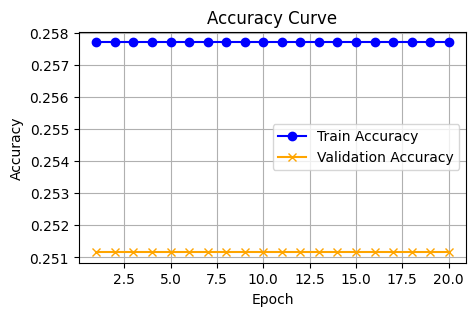

In [29]:
import matplotlib.pyplot as plt

# Initialize lists to store accuracy values for each epoch
train_accuracies = []
val_accuracies = []

# Function to calculate accuracy
def calculate_accuracy(model, data_loader):
    model.eval()  # Set the model to evaluation mode
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():  # Disable gradient computation
        for features, labels in data_loader:
            outputs = model(features).squeeze()
            predictions = (outputs > 0.5).float()  # Convert probabilities to binary (0 or 1)
            correct_predictions += (predictions == labels).sum().item()
            total_predictions += labels.size(0)

    return correct_predictions / total_predictions

# Training loop with tracking of accuracy values
num_epochs = 20  # Adjust this based on your needs

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    epoch_loss = 0  # To accumulate the loss per epoch

    for features, labels in train_loader:
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(features).squeeze()  # Forward pass

        # Calculate loss
        loss = criterion(outputs, labels.float())  # Ensure labels are float for BCELoss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        epoch_loss += loss.item()  # Accumulate batch loss

    # Calculate average loss for the epoch
    avg_epoch_loss = epoch_loss / len(train_loader)
    loss_values.append(avg_epoch_loss)  # Store the average loss for this epoch

    # Calculate accuracies
    train_accuracy = calculate_accuracy(model, train_loader)
    val_accuracy = calculate_accuracy(model, test_loader)

    # Store accuracy values
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    # Print loss and accuracy for the current epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_epoch_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}')

# Plot the accuracy curve
plt.figure(figsize=(5, 3))
plt.plot(range(1, num_epochs + 1), train_accuracies, marker='o', label='Train Accuracy', color='blue')
plt.plot(range(1, num_epochs + 1), val_accuracies, marker='x', label='Validation Accuracy', color='orange')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
